# ai03dTasks
# Machine Learning: Decision Trees
## Train, Evaluate, and Apply the Model

**Instructions:**
- Complete each task below by running the code cells
- Fill in the blanks and answer questions in markdown cells
- Save your work when finished
- Push this file to your GitHub "Machine Learning" Repo under the appropriate folder.


---
## Setup: Complete Data Preparation (Lessons 1-3)

Run this cell first - it completes all steps from Lessons 3a, 3b, and 3c:
- Loads the Titanic dataset
- Selects useful features
- Handles missing values
- Encodes categorical variables
- Creates X (features) and y (target)

**After running this, you'll be ready to train your model!**

In [1]:
# Import the tools we need: pandas for data, matplotlib for charts, scikit-learn for ML models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import warnings  # Suppressing warnings will keep our notebooks clean 

warnings.filterwarnings('ignore')   # Hides all warning messages

# Load the CSV file into a DataFrame so we can work with it in Python
df = pd.read_csv("Titanic Dataset.csv")
print(f"✓ Dataset loaded: {df.shape}")      # Show number of rows and columns

# Keep only the columns we need for our model (removes extra/unnecessary data)
df = df[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
print(f"✓ Features selected: {df.shape[1]} columns")

# Convert `fare` and `age` to a numeric type since they have tripped us up previously (non-numeric values turn into NaN if needed)
df[['fare', 'age']] = df[['fare', 'age']].apply(pd.to_numeric, errors='coerce')

# Fill missing ages/fares with the median and remove rows missing "embarked"
df['age'].fillna(df['age'].median(), inplace=True)     # Replace missing ages
df['fare'].fillna(df['fare'].median(), inplace=True)   # Replace missing fares
df.dropna(subset=['embarked'], inplace=True)           # Drop rows missing a category
print(f"✓ Missing values handled: {df.isnull().sum().sum()} remaining")

# Convert text columns ("sex", "embarked") into numeric dummy variables for ML
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)
print(f"✓ Categorical variables encoded")

# Split data into features (X) the model uses, and the target (y) we want to predict
X = df.drop('survived', axis=1)    # All columns except the answer
y = df['survived']                 # The column we want to predict

print(f"\n✓ Data preparation complete!")
print(f"X shape: {X.shape} (rows, features)")   # How many rows/features we have
print(f"y shape: {y.shape} (rows)")             # Number of target labels
print(f"Feature names: {X.columns.tolist()}")  # The final features used for ML
print(f"\nSurvival rate: {y.mean():.2%}")      # Quick look at target distribution


✓ Dataset loaded: (1309, 14)
✓ Features selected: 8 columns
✓ Missing values handled: 0 remaining
✓ Categorical variables encoded

✓ Data preparation complete!
X shape: (1307, 8) (rows, features)
y shape: (1307,) (rows)
Feature names: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']

Survival rate: 38.10%


### Let's do a quick inspection: 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1307 non-null   int64  
 1   survived    1307 non-null   int64  
 2   age         1307 non-null   float64
 3   sibsp       1307 non-null   int64  
 4   parch       1307 non-null   int64  
 5   fare        1307 non-null   float64
 6   sex_male    1307 non-null   bool   
 7   embarked_Q  1307 non-null   bool   
 8   embarked_S  1307 non-null   bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 75.3 KB


---
# Part 1: Train/Test Split

Now we'll split our prepared data into training and testing sets.

## Task 1: Split the Data

Split into 80% training and 20% testing.

In [4]:
# TODO: Use train_test_split to split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,           # X and y
    test_size=0.2,  # 20% for testing (0.2)
    random_state=42 # Use 42 for reproducibility
)

print("✓ Data split complete!")
print(f"Training set: {X_train.shape[0]} passengers ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} passengers ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining survival rate: {y_train.mean():.2%}")
print(f"Testing survival rate: {y_test.mean():.2%}")

✓ Data split complete!
Training set: 1045 passengers (80.0%)
Testing set: 262 passengers (20.0%)

Training survival rate: 37.51%
Testing survival rate: 40.46%


**Q1: How many passengers are in the training set?**

A: 1045

**Q2: Why do we split the data before training?**

A: so that you only use the important data to train the model

---
# Part 2: Train the Model

## Task 2: Create and Train the Decision Tree

In [5]:
# Create a Decision Tree model with a limited depth (to prevent overfitting)
model = DecisionTreeClassifier(
    max_depth=4,      # Limits how deep the tree can grow (set to 4 for now)
    random_state=42    # Controls the model's own randomness (different from the split's randomness)
)

# Train the model: teach it by giving it the training features (X_train) and answers (y_train)
model.fit(X_train, y_train)

print("✓ Model trained successfully!")

# Show how deep the trained tree grew
print(f"Tree depth: {model.get_depth()}")

# Show how many leaf nodes (final decision points) the tree has
print(f"Number of leaves: {model.get_n_leaves()}")

# Show how many input features the model actually used
print(f"Features used: {model.n_features_in_}")


✓ Model trained successfully!
Tree depth: 4
Number of leaves: 16
Features used: 8


**Q3: What does max_depth=4 mean?**

A: it limits how long the tree can be

**Q4: What does the .fit() method do?**

A: it trains the model with x and y train

---
# Part 3: Evaluate the Model

## Task 3: Make Predictions and Calculate Accuracy

In [6]:
# Use the trained model to predict survival on the test features (X_test)
y_pred = model.predict(X_test)

# Compare predictions to actual answers (y_test) and compute accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("✓ Predictions made!")
print(f"Accuracy: {accuracy:.4f}")        # Accuracy as a decimal
print(f"Accuracy: {accuracy*100:.2f}%")   # Same accuracy as a percentage

# Count how many predictions the model got correct
correct = (y_pred == y_test).sum()
total = len(y_test)
print(f"\nCorrect predictions: {correct} out of {total}")

# Show the first 10 predictions next to the real answers for a quick check
print("\nFirst 10 predictions vs actual:")
comparison = pd.DataFrame({
    'Predicted': y_pred[:10],
    'Actual': y_test[:10].values,
    'Match': ['✓' if p == a else '✗' for p, a in zip(y_pred[:10], y_test[:10])]
})
print(comparison)


✓ Predictions made!
Accuracy: 0.7557
Accuracy: 75.57%

Correct predictions: 198 out of 262

First 10 predictions vs actual:
   Predicted  Actual Match
0          0       0     ✓
1          0       1     ✗
2          0       0     ✓
3          0       0     ✓
4          0       0     ✓
5          0       0     ✓
6          0       0     ✓
7          0       0     ✓
8          0       0     ✓
9          1       1     ✓


**Q5: What is your model's accuracy as a percentage?**

A: 75%

**Q6: Is this better than random guessing (50%)?**

A: yes

## Task 4: Detailed Classification Report

In [7]:
# TODO: Generate classification report, use `y_test` and `y_pred`
print("Classification Report:")
print("=" * 50)
print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))

Classification Report:
              precision    recall  f1-score   support

        Died       0.77      0.84      0.80       156
    Survived       0.73      0.63      0.68       106

    accuracy                           0.76       262
   macro avg       0.75      0.74      0.74       262
weighted avg       0.75      0.76      0.75       262



### Understanding the Classification Report

The table above (output after you run the script) shows how well the model performed for each class (Died vs Survived).

| Row / Column | What it means |
|--------------|----------------|
| **Died** / **Survived** | The two classes the model predicts. Each row shows how well the model did for that specific group. |
| **precision** | When the model predicted this class, how often was it correct? |
| **recall** | Out of all the real people in this class, how many did the model correctly identify? |
| **f1-score** | A single score that combines precision and recall. |
| **support** | How many actual examples of that class were in the test data. |

---

### Summary Rows

| Row | What it means |
|-----|----------------|
| **accuracy** | The overall percent of predictions the model got right. |
| **macro avg** | The average of precision/recall/F1 across both classes, treating them equally. |
| **weighted avg** | The average of the scores, but weighted based on how many examples each class has. |

### Summary
These metrics show how well the model performs for each class and overall, helping us see which groups it predicts well and which ones it struggles with.

**What is considered good?**  
- **0.90–1.00** → Excellent  
- **0.80–0.89** → Very good  
- **0.70–0.79** → Decent / acceptable  
- **Below 0.70** → Needs improvement


**Q7: What is the precision for 'Survived'?**

A: 73%

**Q8: What is the recall for 'Survived'?**

A: 63%

**Q9: In your own words, explain what precision means:**

A: how correct the model was

## Task 5: Feature Importance

### Understanding Feature Importance

Feature importance tells us which input features (age, fare, pclass, etc.) the decision tree relied on the most when making predictions.  
Higher importance values mean the feature contributed more to the model’s decisions.  
The total importance adds up to about 1.0, showing how the model distributes its “attention” across all features.

In [8]:
# Create a DataFrame showing each feature and how important it was in the model
importance_df = pd.DataFrame({
    'feature': X.columns,                 # The names of all input features
    'importance': model.feature_importances_  # How much each feature helped the tree make decisions
}).sort_values('importance', ascending=False)  # Sort so the most important features appear first

print("Feature Importance:")
print("=" * 50)

# Print the DataFrame in a clean, readable format (no row numbers)
print(importance_df.to_string(index=False))

# Show the total importance (should be close to 1.0)
print(f"\nTotal importance: {importance_df['importance'].sum():.2f}")


Feature Importance:
   feature  importance
  sex_male    0.600368
    pclass    0.208518
       age    0.086504
      fare    0.055795
     sibsp    0.044713
embarked_Q    0.002774
     parch    0.001328
embarked_S    0.000000

Total importance: 1.00


**Q10: Which feature is most important?**

A: sex_mail

**Q11: Does this make sense historically (women and children first)?**

A: yes

## Task 6: Visualize Feature Importance
The code below uses Matplotlib to create the feature-importance chart. All the `plt` commands come from the Matplotlib package we imported at the top.

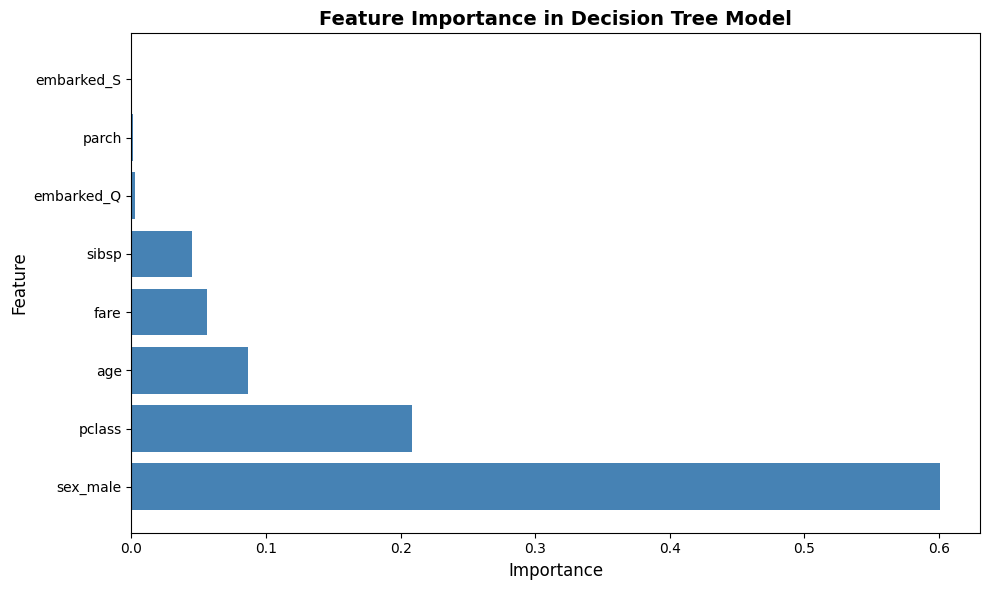

In [9]:
plt.figure(figsize=(10, 6))                            # Start a new chart and set the overall width/height
plt.barh(importance_df['feature'],
         importance_df['importance'],
         color='steelblue')                            # Draw a horizontal bar chart using our features and their scores
plt.xlabel('Importance', fontsize=12)                  # Label the x-axis so we know what the numbers represent
plt.ylabel('Feature', fontsize=12)                     # Label the y-axis with each feature’s name
plt.title('Feature Importance in Decision Tree Model',
          fontsize=14, fontweight='bold')              # Add a clear title to explain what the chart shows
plt.tight_layout()                                     # Fix spacing so labels don’t overlap or get cut off
plt.show()                                             # Display the final chart on the screen

---
# Part 4: Visualize the Decision Tree

## Task 7: Create Tree Visualization

### How to Read the Decision Tree (Key)

- **Colors:**  
  - *Blue* = model leans toward **Survived**  
  - *Orange* = model leans toward **Died**  
  - Darker color = stronger confidence; lighter color = more mixed data  

- **Split Rule (top line):**  
  The condition used to divide the data (e.g., `sex_male <= 0.5`).  
  Left branch = condition is True; right branch = condition is False.

- **gini:**  
  A measure of how mixed the node is.  
  - 0.0 = perfectly pure (all the same class)  
  - Higher values = more mixed (less certain)

- **samples:**  
  How many passengers reached that point in the tree.

- **value = [Died, Survived]:**  
  The number of passengers from each class in the node.

- **class = … :**  
  The predicted class for that node (whichever has more samples).


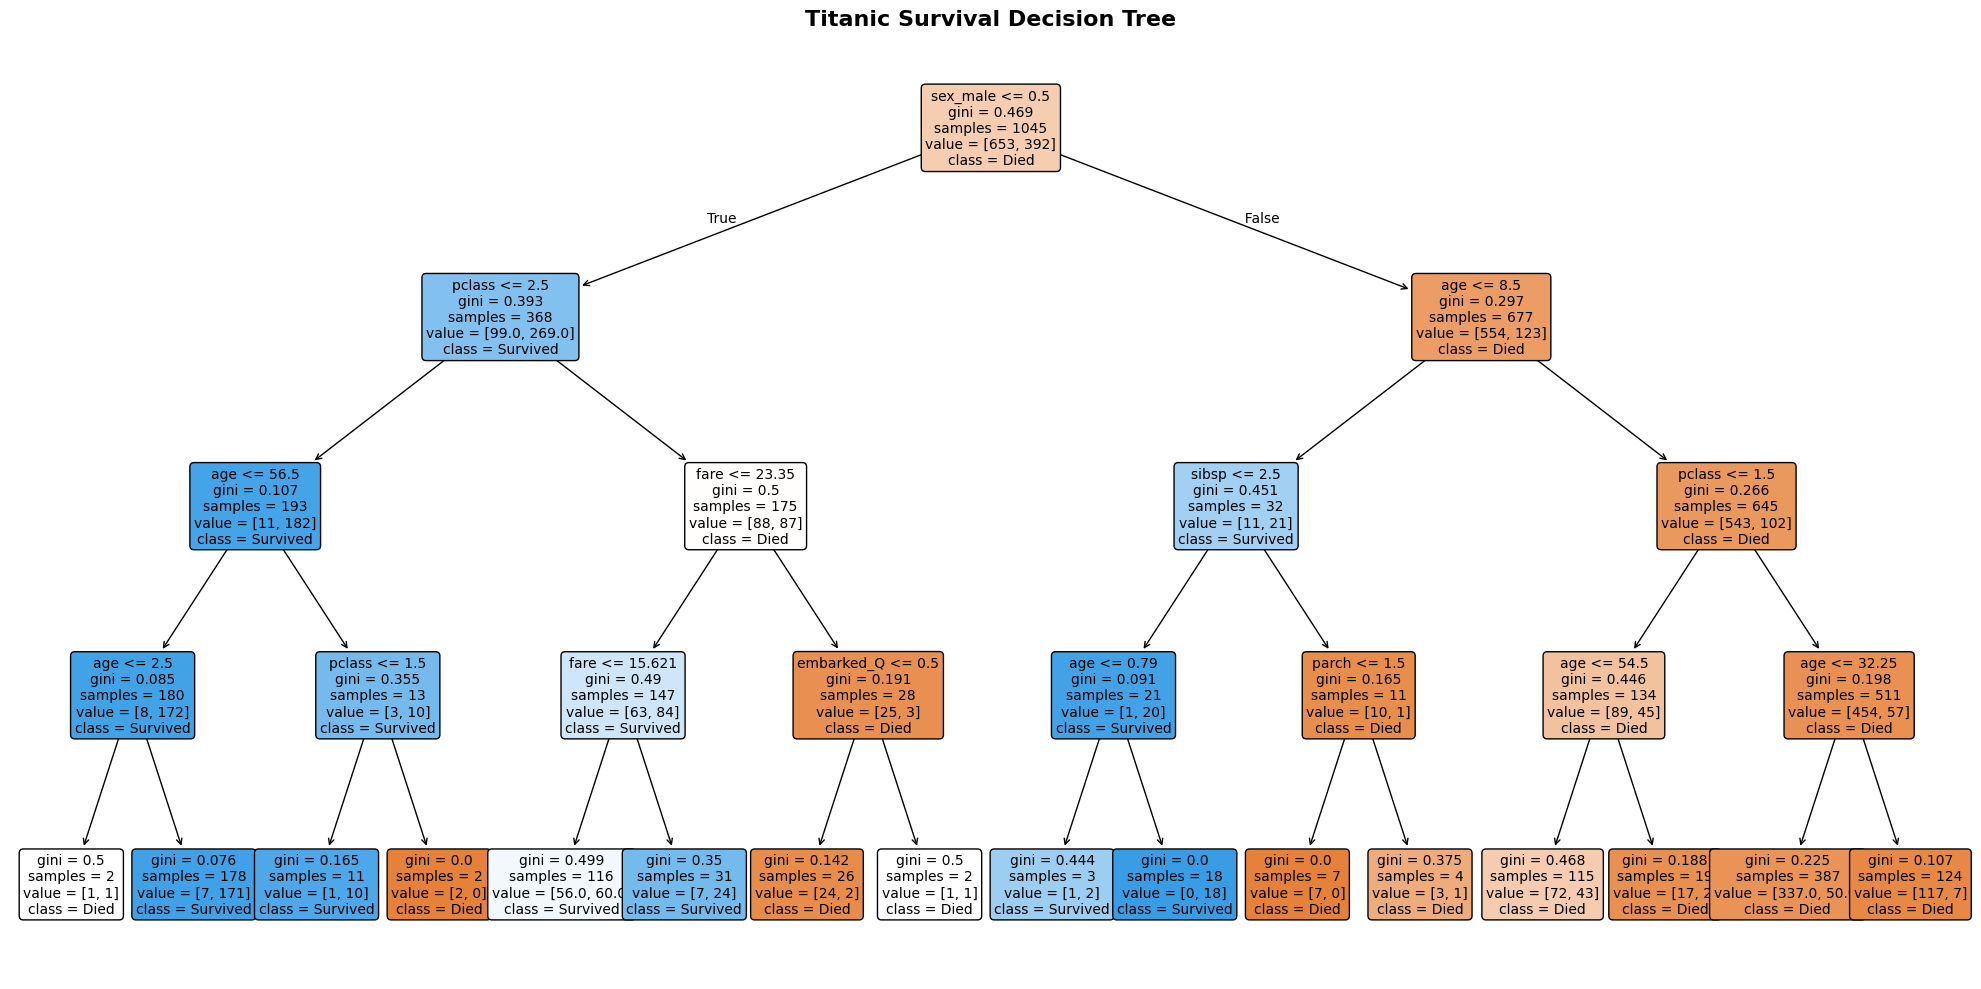

In [10]:
# TODO: Create tree visualization
plt.figure(figsize=(20, 10))  # Try (20, 10)
plot_tree(
    model,                           # The trained model
    feature_names=X.columns,         # X.columns
    class_names=['Died', 'Survived'],
    filled=True,                     # Color nodes by prediction
    rounded=True,                    # Rounded boxes
    fontsize=10
)
plt.title("Titanic Survival Decision Tree", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Q12: What is the first question (root node) the tree asks?**

A: are you male

**Q13: What color represents 'Survived' predictions?**

A: blue

**Q14: Find one decision path from root to leaf and describe it:**

A: female, age less than 2.5, survived

---
# Part 5: Make New Predictions

## Task 8: Create Test Scenarios

Feature order: `[pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]`

Remember:
- pclass: 1, 2, or 3
- sex_male: 1=male, 0=female
- embarked_Q: 1=Queenstown, 0=not
- embarked_S: 1=Southampton, 0=not
- If both Q and S are 0, passenger embarked at Cherbourg (C)

### Scenario 1: Poor young man in 3rd class

In [11]:
# Example: 3rd class, 25yo male, no family, low fare, embarked at S
passenger1 = [[3, 25, 0, 0, 7.25, 1, 0, 1]]

# Make prediction
pred = model.predict(passenger1)
prob = model.predict_proba(passenger1)

print("Scenario 1: Poor young man in 3rd class")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")
print(f"Death probability: {prob[0][0]:.2%}")

Scenario 1: Poor young man in 3rd class
Prediction: Died
Survival probability: 12.92%
Death probability: 87.08%


### Scenario 2: Wealthy young woman in 1st class

### How to fill in the passenger data
We must list the values in the same order as the model’s feature columns:

[pclass, age, sibsp, parch, fare, sex_male, embarked_Q, embarked_S]

Then fill in each value:
- pclass = 1 (1st class)
- age = 25
- sibsp = 0 (no siblings/spouse)
- parch = 0 (no parents/children)
- fare = 100
- sex_male = 0 (female)
- embarked_Q = 0 (did not embark at Queenstown)
- embarked_S = 1 (embarked at Southampton)


In [13]:
# TODO: Create passenger: 1st class, 25yo female, no family, high fare ($100), embarked at S
# Hint: sex_male=0 for female
woman_1st = [[1, 25, 0, 0, 100, 0, 0, 1]]

pred = model.predict(woman_1st)
prob = model.predict_proba(woman_1st)

print("Scenario 2: Wealthy young woman in 1st class")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")

Scenario 2: Wealthy young woman in 1st class
Prediction: Survived
Survival probability: 96.07%


### Scenario 3: Young boy in 3rd class with family

In [14]:
# TODO: Create passenger: 3rd class, 5yo male, 1 sibling, 2 parents, medium fare ($20), embarked at S
boy_3rd = [[3, 5, 1, 2, 20, 1, 0, 1]]

pred = model.predict(boy_3rd)
prob = model.predict_proba(boy_3rd)

print("Scenario 3: Young boy with family")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")

Scenario 3: Young boy with family
Prediction: Survived
Survival probability: 100.00%


### Scenario 4: Elderly man in 1st class

In [15]:
# TODO: Create passenger: 1st class, 65yo male, no family, very high fare ($500), embarked at C
# Hint: embarked at C means embarked_Q=0 and embarked_S=0
man_1st_elderly = [[1, 65, 0, 0, 500, 1, 1, 0]]

pred = model.predict(man_1st_elderly)
prob = model.predict_proba(man_1st_elderly)

print("Scenario 4: Wealthy elderly man in 1st class")
print(f"Prediction: {'Survived' if pred[0] == 1 else 'Died'}")
print(f"Survival probability: {prob[0][1]:.2%}")

Scenario 4: Wealthy elderly man in 1st class
Prediction: Died
Survival probability: 10.53%


---
# Reflection Questions

**Q15: Which factors seemed most important for survival based on your scenarios?**

A: sex and age

**Q16: Did the model's predictions match the historical "women and children first" policy?**

A: yes

**Q17: Were any predictions surprising? Why?**

A: not really

**Q18: How does visualizing the tree help you understand the model?**

A: because it makes it easier to look at the prediction scatter

**Q19: What are some real-world applications where decision trees could be useful?**

A: predicting the sucess rates of a circuit depending on the parts used

**Q20: What was the most challenging part of this machine learning project?**

A: understanding it

---
# Final Task

## Compare Different Tree Depths

Train models with different max_depth values and compare their accuracy.

In [16]:
# TODO: Train models with max_depth of 3, 4, 5, 10, and None (unlimited)
# Compare their training and testing accuracy

depths = [3, 4, 5, 10, None]
results = []

for depth in depths:
    # Train model
    model_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_temp.fit(X_train, y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, model_temp.predict(X_train))
    test_acc = accuracy_score(y_test, model_temp.predict(X_test))
    
    results.append({
        'max_depth': depth,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'difference': train_acc - test_acc
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.to_string(index=False))
print("\nNote: Large difference between train and test accuracy suggests overfitting!")


Model Comparison:
 max_depth  train_accuracy  test_accuracy  difference
       3.0        0.826794       0.763359    0.063435
       4.0        0.828708       0.755725    0.072983
       5.0        0.835407       0.759542    0.075865
      10.0        0.916746       0.751908    0.164838
       NaN        0.969378       0.732824    0.236554

Note: Large difference between train and test accuracy suggests overfitting!


---
# Unit Complete!

**Congratulations! You've completed the Machine Learning with Decision Trees unit!**

**You've learned:**
- Complete ML pipeline from raw data to predictions
- Data loading, cleaning, and preprocessing
- Feature engineering (one-hot encoding)
- Train/test splitting for honest evaluation
- Training decision tree classifiers
- Evaluating with accuracy, precision, recall, F1
- Interpreting feature importance
- Visualizing decision trees
- Making predictions on new data

**This workflow applies to ALL machine learning projects!**

**Next steps we will take:**
- Try this pipeline with different datasets
- Explore other algorithms (Random Forests, Logistic Regression, etc.)
- Learn about feature engineering
- Study hyperparameter tuning
- Practice with real-world problems!

Save this notebook and push to GitHub. Great work!